## Comparing Property Groups
Is one set of properties better than another? Is pink better than orange? Are train stations good? Setup a comparison between two players each owning different properties. Send the players around the board and after each persons turn, place a dot on the scatter chart marking how much money they have. Keep repeating this and the scattering of dots indicates the trend.

Where significant number of dots land below the zero line, there is a good chance of the person going bankrupt which is the aim of the game.

  1.062837 seconds (2.78 M allocations: 144.264 MiB, 4.38% gc time)


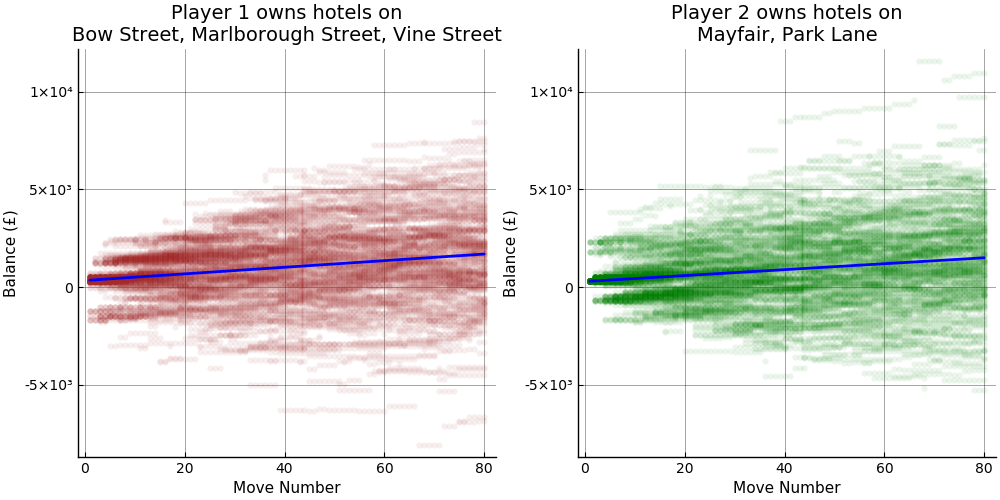

In [1]:
include("mp-datastructures.jl")
include("mp-functions.jl")
using Plots
pyplot()

# [squarenumber, owner, built]
# built = 0 for nothing; 1,2,3,4 for houses; 5 for hotel
buildings = [
    [2, 0, 0], # Old Kent Road,        brown
    [4, 0, 0], # Whitechapel Road,    brown
    [6, 0, 0], # Kings Cross Station
    [7, 0, 0], # The Angel Islington, cyan
    [9, 0, 0], # Euston Road,         cyan
    [10, 0, 0], # Pentonville Road,   cyan
    [12, 0, 0], # Pall Mall,          pink
    [13, 0, 0], # Electric Company
    [14, 0, 0], # Whitehall,          pink
    [15, 0, 0], # Northumberland Avenue, pink
    [16, 0, 0], # Marylebone Station
    [17, 1, 5], # Bow Street,         orange
    [19, 1, 5], # Marlborough Street, orange
    [20, 1, 5], # Vine Street,        orange
    [22, 0, 0], # Strand,             red
    [24, 0, 0], # Fleet Street,       red
    [25, 0, 0], # Trafalgar Square,   red
    [26, 0, 0], # Fenchurch Street Station
    [27, 0, 0], # Leicester Square,   yellow
    [28, 0, 0], # Coventry Street,    yellow
    [29, 0, 0], # Water Works
    [30, 0, 0], # Piccadilly,         yellow
    [32, 0, 0], # Regent Street,      green
    [33, 0, 0], # Oxford Street,      green
    [35, 0, 0], # Bond Street,        green
    [36, 0, 0], # Liverpool Street Station, 
    [38, 2, 5], # Park Lane,          blue
    [40, 2, 5] # Mayfair,             blue
]

"""    linearfit(x, y)
Computes least squares fit straight line between scattered x and y points.
Returns pair of points as an x-array and y-array that can be used to directly plot a straight line"""
function linearfit(x, y)
    # sum_xx is sum of squares of x, sum_xy is sum of x*y
    sum_xx = sum(x -> x^2, x)
    sum_xy = sum(x .* y)
    n = length(x)
    # y = bx + a where b is slope and a is intercept
    slope = (n*sum_xy - sum(x)*sum(y)) /
            (n*sum_xx - sum(x)^2)
    intercept = (sum(y) - slope*sum(x)) / n
    xpoints = [minimum(x), maximum(x)]
    ypoints = slope .* xpoints .+ intercept
    return xpoints, ypoints
end

"""    simulatemoney(ngames, nmoves, builddata)
Setup new game with 2 players. Define ownership and build level of properties.
Each game lasts for nmoves and the game is repeated ngames times.
function returns 3 arrays: the move number; player1 balance; player 2 balance
The columns of the builddata array are:
[square, owner, built]
square = number from 1 to 40.
owner = number denoting player.
built = 0 for nothing; 1,2,3,4 for houses; 5 for hotel"""
function simulatemoney(ngames, nmoves, builddata)
    moveN = []
    balance1 = []
    balance2 = []
    for game in 1:ngames
        mygame = newgame(300, 300)
        buildproperty!(mygame, builddata)
        # random starting point
        for player in mygame.players
            player.location = rand(1:40)
        end
        for move in 1:nmoves
            currentplayer = mygame.players[mygame.currentplayer]
            visited = taketurn!(mygame)
            # gather results
            push!(moveN, move)
            push!(balance1, mygame.players[1].money)
            push!(balance2, mygame.players[2].money)
            # use modulo to loop around all players
            nextperson = 1 + (mygame.currentplayer % length(mygame.players))
            mygame.currentplayer = nextperson
        end
    end
    return moveN, balance1, balance2
end

"""    compare_plots(x, y1, y2, x1trend, y1trend, x2trend, y2trend; title1, title2)
Convenience function to plot and compare two sets of results"""
function compare_plots(x, y1, y2, x1trend, y1trend, x2trend, y2trend; title1, title2)
    p1 = plot(x, y1, title=title1, seriestype=:scatter, seriescolor="brown")
    p1 = plot!(x1trend, y1trend, seriescolor="blue", linewidth=2)
    p2 = plot(x, y2, title=title2, seriestype=:scatter, seriescolor="green")
    p2 = plot!(x2trend, y2trend, seriescolor="blue", linewidth=2)
    p_all = plot(p1, p2
        ,link=:all, size=(1000, 500)
        ,markeralpha=.08, markersize=4.5, markerstrokewidth=0
        ,gridalpha=.5, legend=false
        ,xlabel="Move Number", ylabel="Balance (£)"
        ,tickfontsize=10)
    return p_all
end

x, y1, y2 = @time simulatemoney(200, 80, buildings)
x1trend, y1trend = linearfit(x, y1)
x2trend, y2trend = linearfit(x, y2)
compare_plots(x, y1, y2, x1trend, y1trend, x2trend, y2trend
    ,title1="Player 1 owns hotels on\nBow Street, Marlborough Street, Vine Street"
    ,title2="Player 2 owns hotels on\nMayfair, Park Lane"
)


  0.119465 seconds (116.50 k allocations: 8.350 MiB, 6.49% gc time)


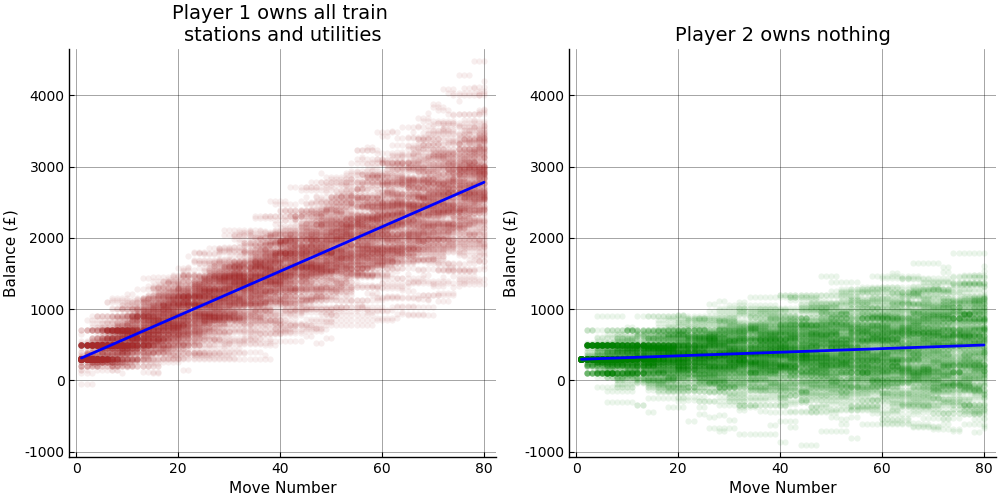

In [2]:
# [squarenumber, owner, built]
# built = 0 for nothing; 1,2,3,4 for houses; 5 for hotel
buildings = [
    [2, 0, 0], # Old Kent Road,        brown
    [4, 0, 0], # Whitechapel Road,    brown
    [6, 1, 0], # Kings Cross Station
    [7, 0, 0], # The Angel Islington, cyan
    [9, 0, 0], # Euston Road,         cyan
    [10, 0, 0], # Pentonville Road,   cyan
    [12, 0, 0], # Pall Mall,          pink
    [13, 1, 0], # Electric Company
    [14, 0, 0], # Whitehall,          pink
    [15, 0, 0], # Northumberland Avenue, pink
    [16, 1, 0], # Marylebone Station
    [17, 0, 0], # Bow Street,         orange
    [19, 0, 0], # Marlborough Street, orange
    [20, 0, 0], # Vine Street,        orange
    [22, 0, 0], # Strand,             red
    [24, 0, 0], # Fleet Street,       red
    [25, 0, 0], # Trafalgar Square,   red
    [26, 1, 0], # Fenchurch Street Station
    [27, 0, 0], # Leicester Square,   yellow
    [28, 0, 0], # Coventry Street,    yellow
    [29, 1, 0], # Water Works
    [30, 0, 0], # Piccadilly,         yellow
    [32, 0, 0], # Regent Street,      green
    [33, 0, 0], # Oxford Street,      green
    [35, 0, 0], # Bond Street,        green
    [36, 1, 0], # Liverpool Street Station, 
    [38, 0, 0], # Park Lane,          blue
    [40, 0, 0] # Mayfair,             blue
]

x, y1, y2 = @time simulatemoney(200, 80, buildings)
x1trend, y1trend = linearfit(x, y1)
x2trend, y2trend = linearfit(x, y2)
compare_plots(x, y1, y2, x1trend, y1trend, x2trend, y2trend
    ,title1="Player 1 owns all train \nstations and utilities"
    ,title2="Player 2 owns nothing"
)


  0.091092 seconds (90.45 k allocations: 7.045 MiB)


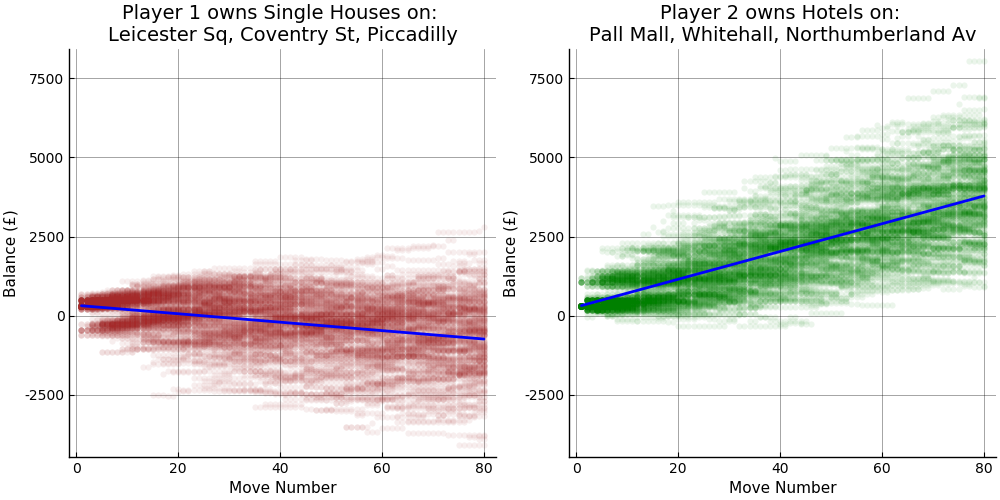

In [7]:
# [squarenumber, owner, built]
# built = 0 for nothing; 1,2,3,4 for houses; 5 for hotel
buildings = [
    [2, 0, 0], # Old Kent Road,        brown
    [4, 0, 0], # Whitechapel Road,    brown
    [6, 0, 0], # Kings Cross Station
    [7, 0, 0], # The Angel Islington, cyan
    [9, 0, 0], # Euston Road,         cyan
    [10, 0, 0], # Pentonville Road,   cyan
    [12, 2, 5], # Pall Mall,          pink
    [13, 0, 0], # Electric Company
    [14, 2, 5], # Whitehall,          pink
    [15, 2, 5], # Northumberland Avenue, pink
    [16, 0, 0], # Marylebone Station
    [17, 0, 0], # Bow Street,         orange
    [19, 0, 0], # Marlborough Street, orange
    [20, 0, 0], # Vine Street,        orange
    [22, 0, 0], # Strand,             red
    [24, 0, 0], # Fleet Street,       red
    [25, 0, 0], # Trafalgar Square,   red
    [26, 0, 0], # Fenchurch Street Station
    [27, 1, 1], # Leicester Square,   yellow
    [28, 1, 1], # Coventry Street,    yellow
    [29, 0, 0], # Water Works
    [30, 1, 1], # Piccadilly,         yellow
    [32, 0, 0], # Regent Street,      green
    [33, 0, 0], # Oxford Street,      green
    [35, 0, 0], # Bond Street,        green
    [36, 0, 0], # Liverpool Street Station, 
    [38, 0, 0], # Park Lane,          blue
    [40, 0, 0] # Mayfair,             blue
]

x, y1, y2 = @time simulatemoney(200, 80, buildings)
x1trend, y1trend = linearfit(x, y1)
x2trend, y2trend = linearfit(x, y2)
compare_plots(x, y1, y2, x1trend, y1trend, x2trend, y2trend
    ,title1="Player 1 owns Single Houses on: \nLeicester Sq, Coventry St, Piccadilly"
    ,title2="Player 2 owns Hotels on: \nPall Mall, Whitehall, Northumberland Av"
)


  0.113122 seconds (96.98 k allocations: 7.243 MiB)


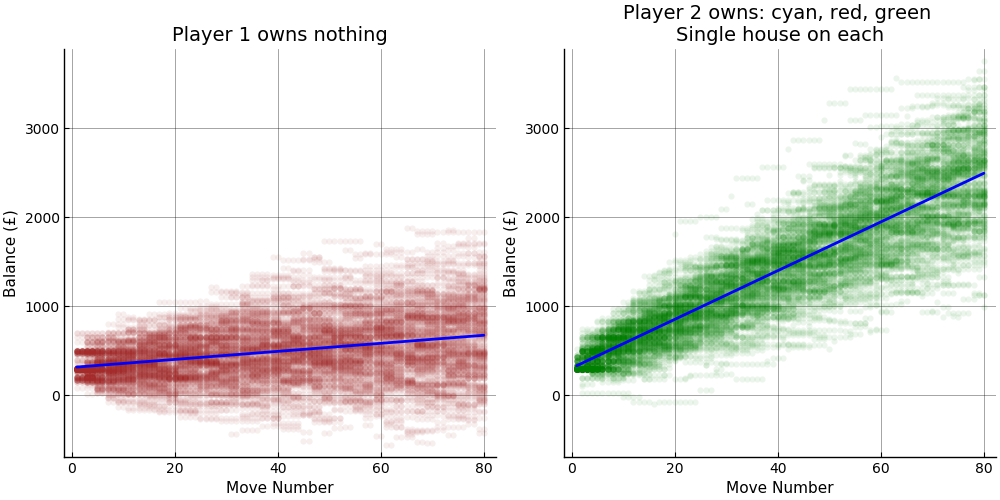

In [14]:
# [squarenumber, owner, built]
# built = 0 for nothing; 1,2,3,4 for houses; 5 for hotel
buildings = [
    [2, 0, 0], # Old Kent Road,        brown
    [4, 0, 0], # Whitechapel Road,    brown
    [6, 0, 0], # Kings Cross Station
    [7, 2, 1], # The Angel Islington, cyan
    [9, 2, 1], # Euston Road,         cyan
    [10, 2, 1], # Pentonville Road,   cyan
    [12, 0, 0], # Pall Mall,          pink
    [13, 0, 0], # Electric Company
    [14, 0, 0], # Whitehall,          pink
    [15, 0, 0], # Northumberland Avenue, pink
    [16, 0, 0], # Marylebone Station
    [17, 0, 0], # Bow Street,         orange
    [19, 0, 0], # Marlborough Street, orange
    [20, 0, 0], # Vine Street,        orange
    [22, 2, 1], # Strand,             red
    [24, 2, 1], # Fleet Street,       red
    [25, 2, 1], # Trafalgar Square,   red
    [26, 0, 0], # Fenchurch Street Station
    [27, 0, 0], # Leicester Square,   yellow
    [28, 0, 0], # Coventry Street,    yellow
    [29, 0, 0], # Water Works
    [30, 0, 0], # Piccadilly,         yellow
    [32, 2, 1], # Regent Street,      green
    [33, 2, 1], # Oxford Street,      green
    [35, 2, 1], # Bond Street,        green
    [36, 0, 0], # Liverpool Street Station, 
    [38, 0, 0], # Park Lane,          blue
    [40, 0, 0] # Mayfair,             blue
]

x, y1, y2 = @time simulatemoney(200, 80, buildings)
x1trend, y1trend = linearfit(x, y1)
x2trend, y2trend = linearfit(x, y2)
compare_plots(x, y1, y2, x1trend, y1trend, x2trend, y2trend
    ,title1="Player 1 owns nothing"
    ,title2="Player 2 owns: cyan, red, green \nSingle house on each"
)
